## Model Selection using RFE (Bike Sharing Assignment)


### Importing and Understanding Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing numpy and pandas for reading and storing the data
import numpy as np
import pandas as pd

In [3]:
# data stored in the variable bike_share
bike_share= pd.read_csv("day.csv")

In [4]:
# Analysing the columns in bike_share
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Preparation

In [5]:
# Analysing the shape of the dataset
bike_share.shape

(730, 16)

In [6]:
# using .info() to check for missing and null values -- there are no null and missing values
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# analysing the spread of values stored in the data
bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# importing matplotlib and seaborn to make pairplot
import matplotlib.pyplot as plt
import seaborn as sns

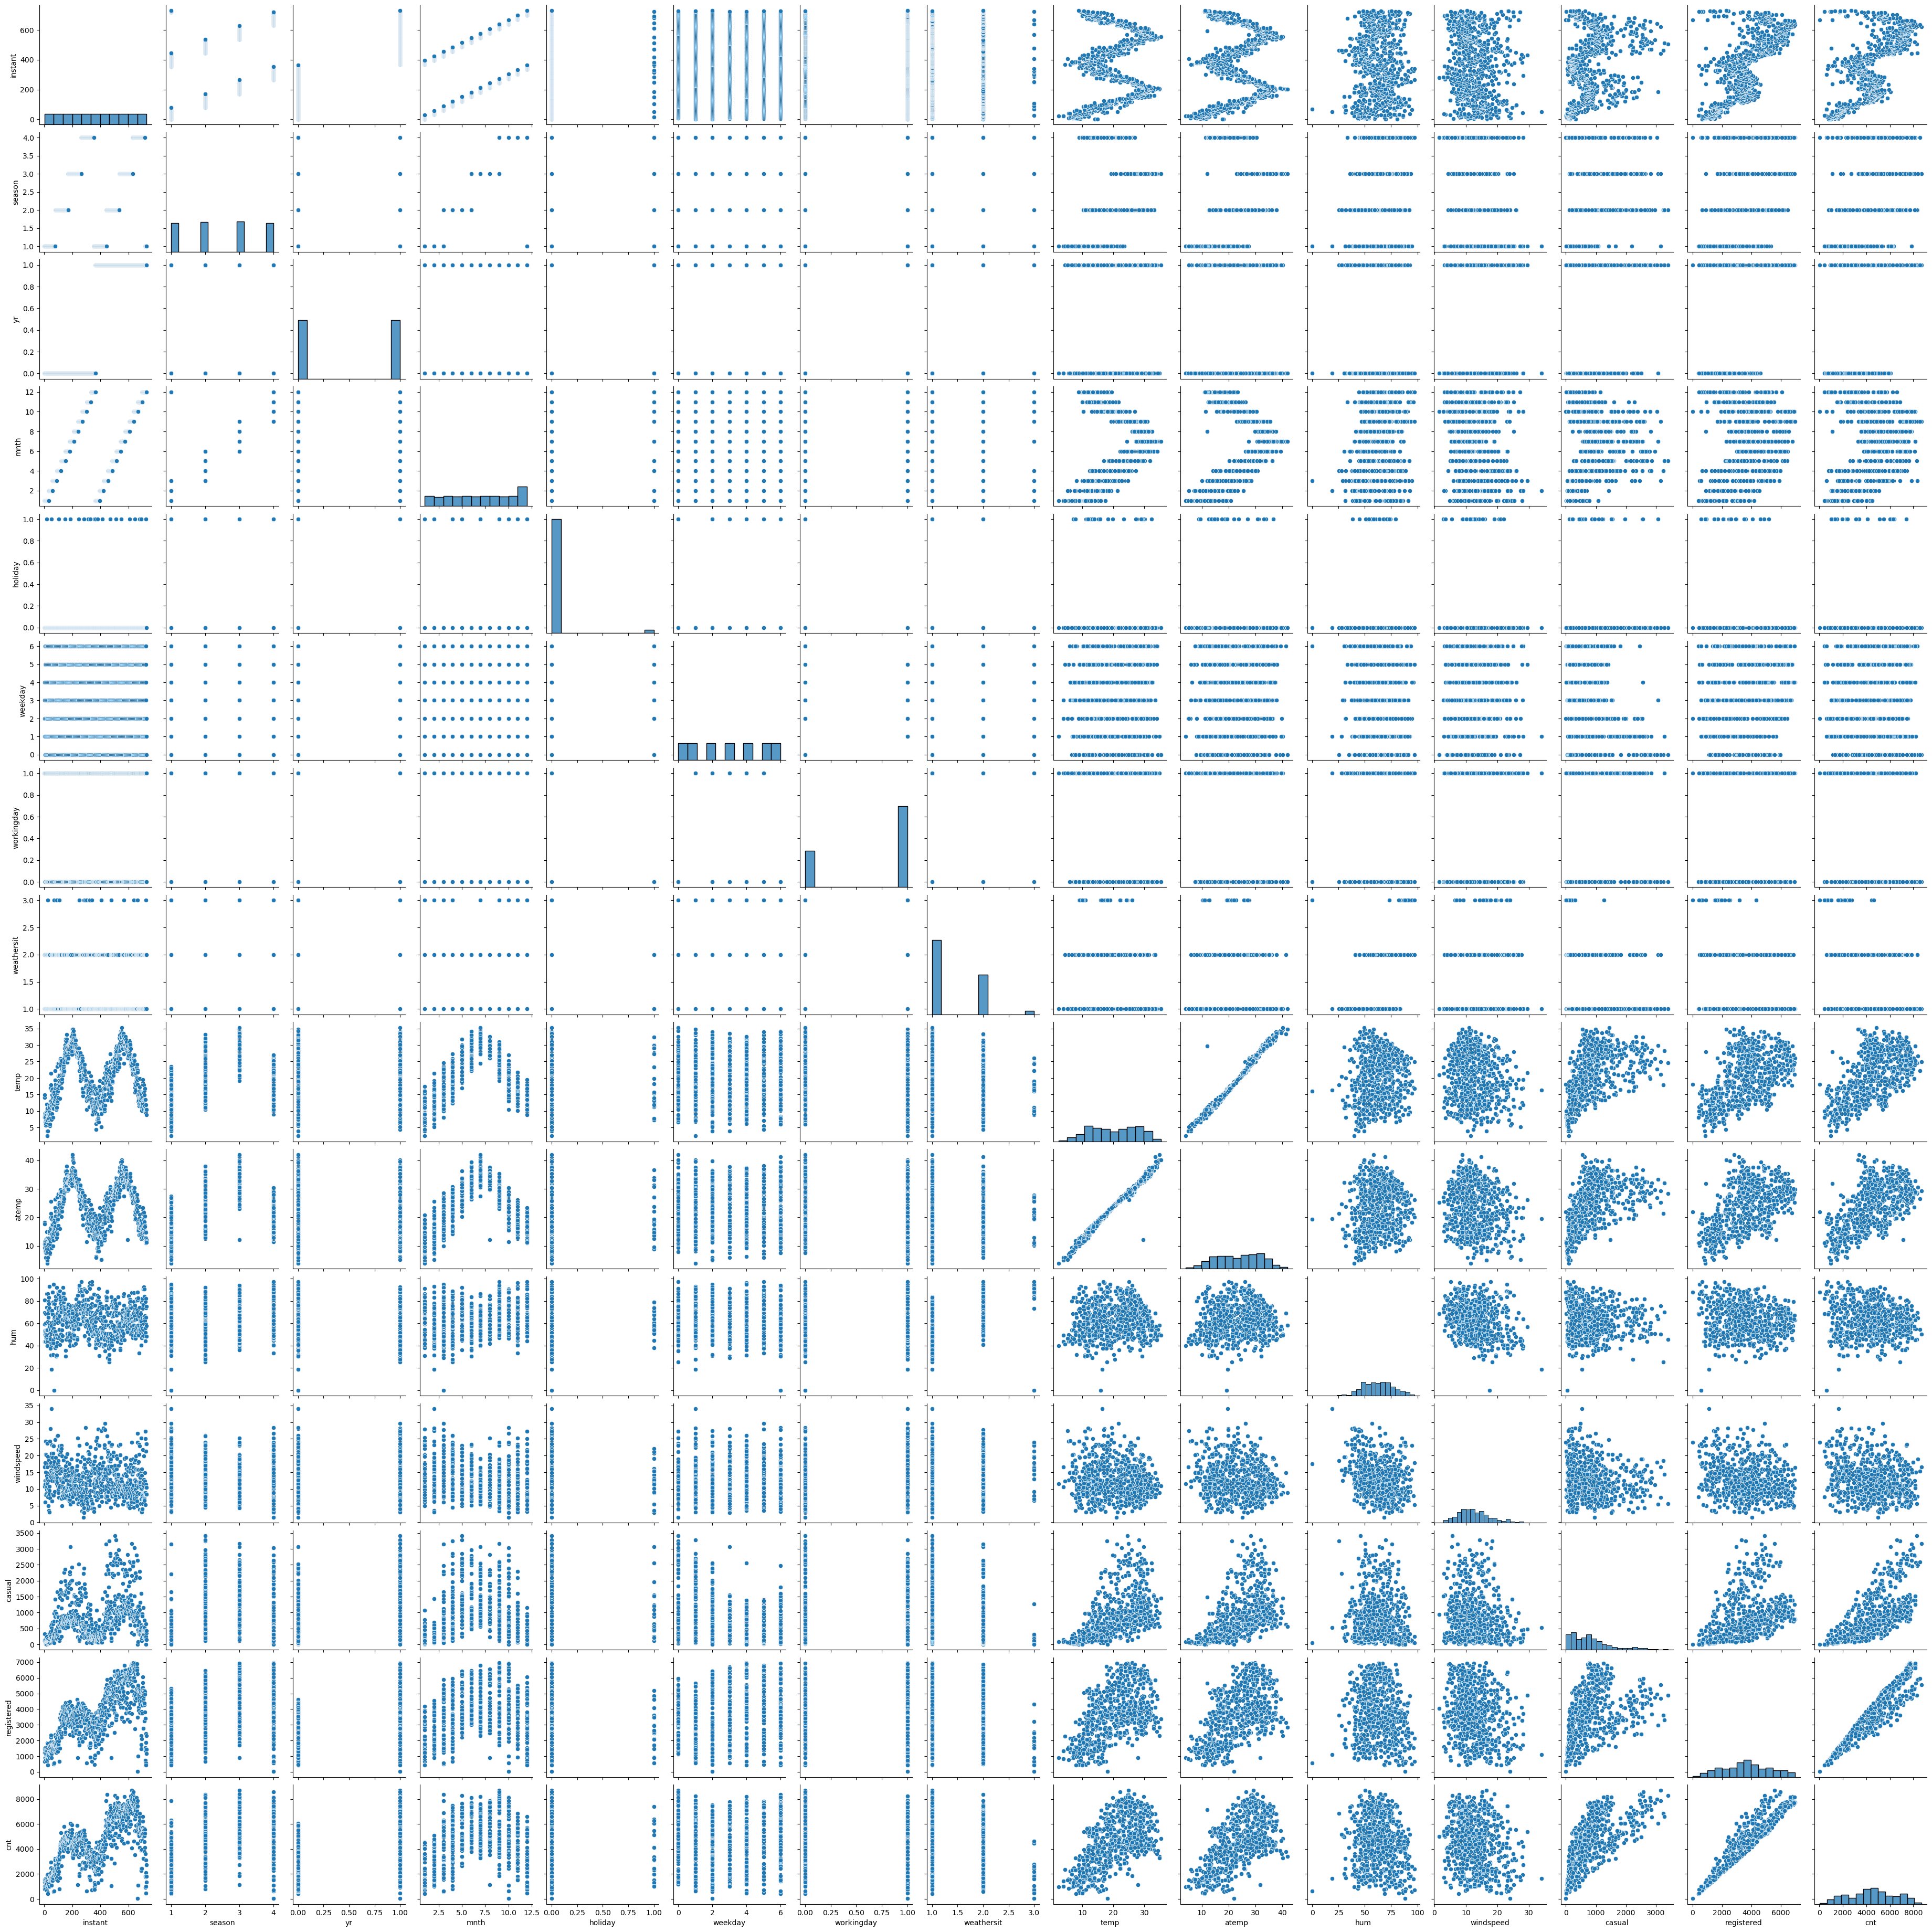

In [9]:
# Analysing the variation of data, taken two at a time
sns.pairplot(bike_share)
plt.show()

In [10]:
# As evident from the pairplot above, the date and instant variations 
# are almost completely caputured by variation in month, year, weekday, holiday columns hence dropping them

bike_share.drop(['instant','dteday'], axis = 1, inplace = True)

In [11]:
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# dropping 'registered' and 'casual' columns as it is also directly part of the target variable 'cnt'
bike_share.drop(['registered'], axis = 1, inplace = True)
bike_share.drop(['casual'], axis = 1, inplace = True)

In [13]:
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Dummy Variables

In [14]:
# List of variables for whom dummy variables need to be prepared

varlist =  ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']

# Get the dummy variables for each feature in 'varlist' and store it in a new variable - 'dummy_list'
# dropping the first variable to avoid multicollinearity
dummy_list = pd.DataFrame()
for i in varlist:
    dummies = pd.get_dummies(bike_share[i], prefix=i, prefix_sep='_', drop_first=True)  
    dummy_list = pd.concat([dummy_list, dummies], axis = 1)
dummy_list.head()    

,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [15]:
# Droping the variables for whom dummy vaiables were extracted and concating with 'dummy_list'
bike_share.drop(varlist, axis = 1, inplace = True)
bike_share = pd.concat([dummy_list, bike_share], axis = 1)

In [16]:
# inspecting the results
bike_share.head()

,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,...,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,temp,atemp,hum,windspeed,cnt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
# Removing restrictions number of columns and rows displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [18]:
# result now displays the complete list
bike_share.head()

,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,temp,atemp,hum,windspeed,cnt
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,9.305237,11.46350,43.6957,12.522300,1600


## Splitting the Data into Training and Testing Sets

In [19]:
from sklearn.model_selection import train_test_split

# specifying this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_share, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling Variables

In [20]:
# importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
# Apply scaler() to all the columns except the'dummy' variables and the target variable
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [23]:
df_train.head()

,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,temp,atemp,hum,windspeed,cnt
653,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0.509887,0.501133,0.575354,0.300794,7534
576,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.815169,0.766351,0.725633,0.264686,7216
426,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.442393,0.438975,0.640189,0.255342,4066
728,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,1796
482,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.395666,0.391735,0.504508,0.188475,4220


In [24]:
df_train.describe()

,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.245098,0.262745,0.24902,0.507843,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314,0.025490,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.711765,0.343137,0.029412,0.537262,0.512989,0.650369,0.320768,4486.382353
std,0.430568,0.440557,0.43287,0.500429,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131,0.157763,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.453386,0.475223,0.169124,0.225844,0.212385,0.145882,0.169797,1952.158739
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000
50%,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.540519,0.526811,0.653714,0.296763,4530.000000
75%,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.735215,0.688457,0.754830,0.414447,5973.500000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000


## Preparing correlation matrix for all variables in the dataset to check whether linear regression could be a good fit

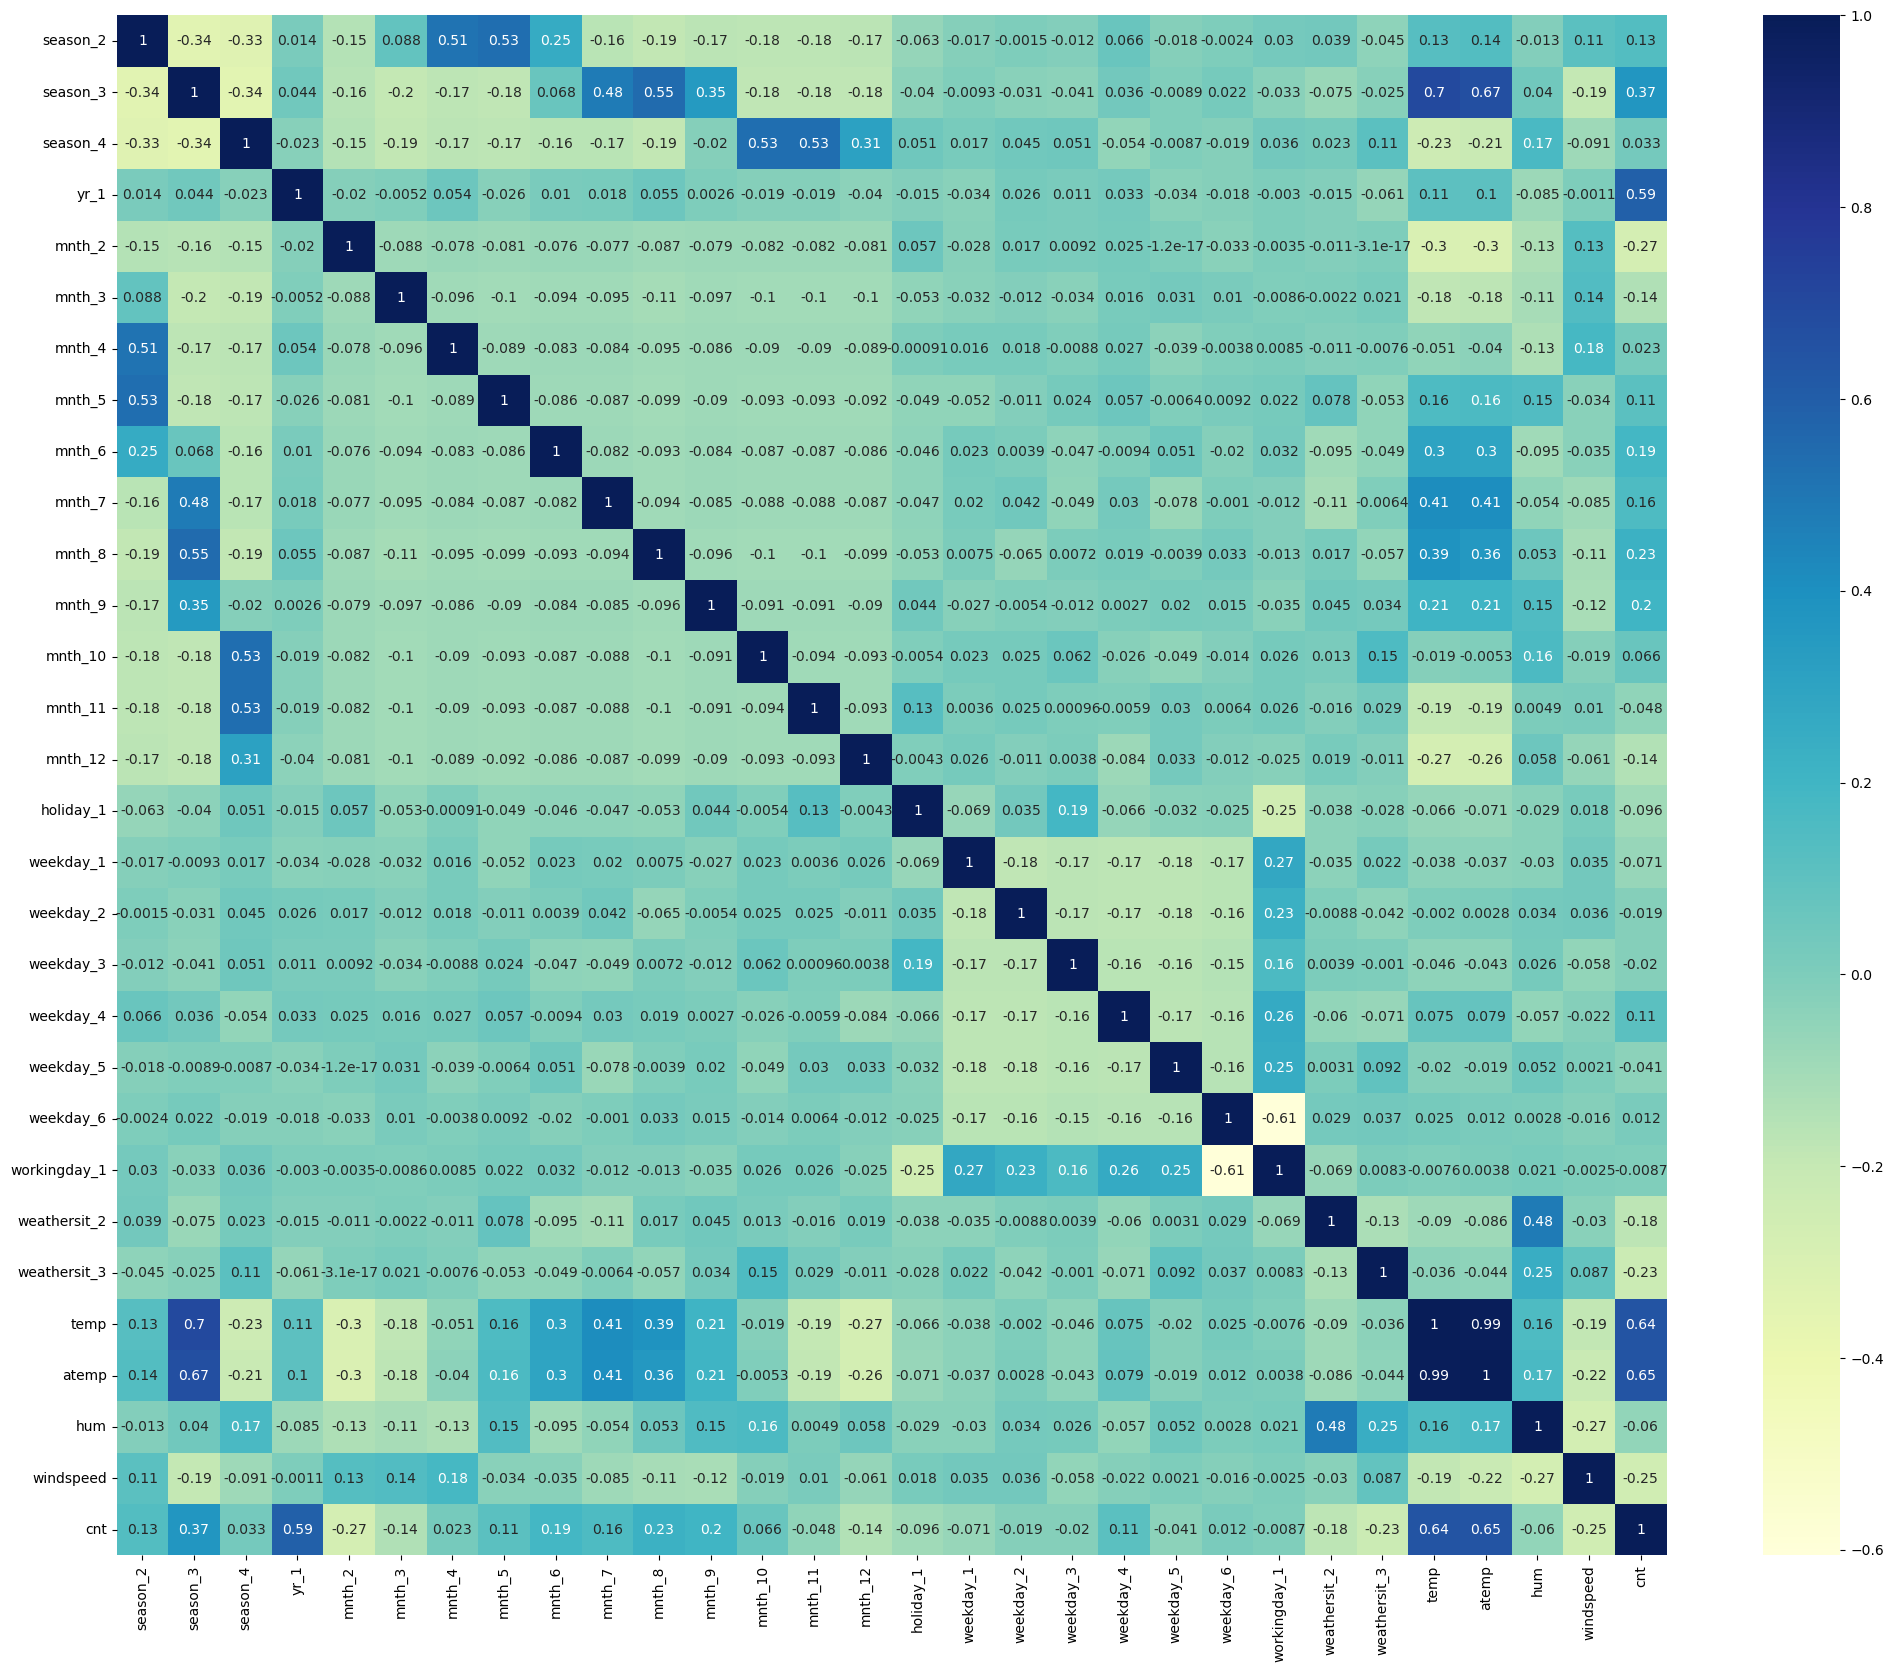

In [25]:
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [26]:
y_train = df_train.pop('cnt')
X_train = df_train

## Model Building

#### RFE

In [27]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [29]:
# chceking which variables got eliminated during RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('yr_1', True, 1),
 ('mnth_2', False, 2),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 2),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 2),
 ('mnth_12', False, 2),
 ('holiday_1', True, 1),
 ('weekday_1', False, 2),
 ('weekday_2', False, 2),
 ('weekday_3', False, 2),
 ('weekday_4', False, 2),
 ('weekday_5', False, 2),
 ('weekday_6', False, 2),
 ('workingday_1', False, 2),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [30]:
# columns included in the model
col = X_train.columns[rfe.support_]
col

Index(['season_2', 'season_4', 'yr_1', 'mnth_3', 'mnth_5', 'mnth_6', 'mnth_8',
       'mnth_9', 'mnth_10', 'holiday_1', 'weathersit_3', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [31]:
# columns not included in the model
X_train.columns[~rfe.support_]

Index(['season_3', 'mnth_2', 'mnth_4', 'mnth_7', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_1', 'weathersit_2', 'atemp'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [32]:
# importing statsmodel library as it provides detailed statistics
import statsmodels.api as sm  

In [33]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [34]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [35]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [36]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sat, 30 Sep 2023   Prob (F-statistic):          5.66e-184
Time:                        17:08:49   Log-Likelihood:                -4126.3
No. Observations:                 510   AIC:                             8283.
Df Residuals:                     495   BIC:                             8346.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2473.9940    232.257     10.652   

In [37]:
# 'mnth_6' is the variable with a very high p-value of 0.616 hence droping it
X_train_new = X_train_rfe.drop(["mnth_6"], axis = 1)

In [38]:
X_train_lm = X_train_new

In [39]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [40]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.4
Date:                Sat, 30 Sep 2023   Prob (F-statistic):          4.51e-185
Time:                        17:08:49   Log-Likelihood:                -4126.4
No. Observations:                 510   AIC:                             8281.
Df Residuals:                     496   BIC:                             8340.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2471.8769    232.044     10.653   

In [41]:
# droping 'mnth_5' as it too has a very high p-value of 0.144 
X_train_new = X_train_new.drop(["mnth_5"], axis = 1)

In [42]:
X_train_lm = X_train_new

In [43]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [44]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.9
Date:                Sat, 30 Sep 2023   Prob (F-statistic):          8.85e-186
Time:                        17:08:49   Log-Likelihood:                -4127.5
No. Observations:                 510   AIC:                             8281.
Df Residuals:                     497   BIC:                             8336.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2432.1021    230.715     10.542   

In [45]:
# dropping 'mnth_3' as well for the same reason
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [46]:
X_train_lm = X_train_new

In [47]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [48]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.0
Date:                Sat, 30 Sep 2023   Prob (F-statistic):          2.03e-186
Time:                        17:08:49   Log-Likelihood:                -4128.8
No. Observations:                 510   AIC:                             8282.
Df Residuals:                     498   BIC:                             8332.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2487.0679    228.486     10.885   

In [49]:
# this is the first set of columns that survived elimination after RFE for having high p-values
X_train_new.columns

Index(['const', 'season_2', 'season_4', 'yr_1', 'mnth_8', 'mnth_9', 'mnth_10',
       'holiday_1', 'weathersit_3', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [50]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [51]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,hum,10.04
8,temp,8.69
10,windspeed,3.57
1,season_4,2.24
2,yr_1,2.01
0,season_2,1.82
5,mnth_10,1.60
3,mnth_8,1.58
4,mnth_9,1.33
7,weathersit_3,1.10


In [52]:
# dropping 'hum' as it has a very high VIF value indication multicollinearity
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [53]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,5.09
9,windspeed,3.01
2,yr_1,2.00
1,season_4,1.91
0,season_2,1.79
5,mnth_10,1.60
3,mnth_8,1.58
4,mnth_9,1.32
7,weathersit_3,1.08
6,holiday_1,1.04


In [54]:
# VIF values seem to be low enough for all the remaining variables, rechecking the model's p-values
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [55]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [56]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     207.3
Date:                Sat, 30 Sep 2023   Prob (F-statistic):          1.41e-170
Time:                        17:08:49   Log-Likelihood:                -4169.1
No. Observations:                 510   AIC:                             8360.
Df Residuals:                     499   BIC:                             8407.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          826.7741    152.324      5.428   

In [57]:
# removing 'mnth_10' because it's high p-value indicates the insignicance of this variable
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [58]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [59]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     229.8
Date:                Sat, 30 Sep 2023   Prob (F-statistic):          2.24e-171
Time:                        17:08:49   Log-Likelihood:                -4170.0
No. Observations:                 510   AIC:                             8360.
Df Residuals:                     500   BIC:                             8402.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          801.2721    151.275      5.297   

In [60]:
# This is the final list of columns
X_train_new.columns

Index(['season_2', 'season_4', 'yr_1', 'mnth_8', 'mnth_9', 'holiday_1',
       'weathersit_3', 'temp', 'windspeed'],
      dtype='object')

## Residual Analysis of the train data

In [61]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

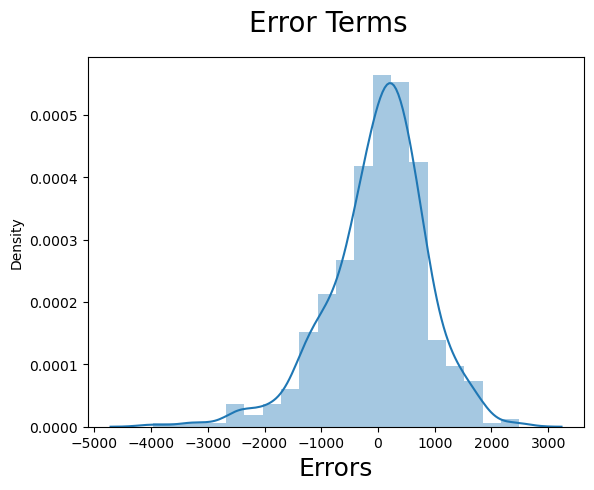

In [62]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [63]:
# Clearly the error terms follow noormal distribution! now chceking their r2 score-
from sklearn.metrics import r2_score
r2_score(y_train, y_train_price)

0.8053072809807098

## Making Predictions

In [64]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [65]:
y_test = df_test.pop('cnt')
X_test = df_test

In [66]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [67]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

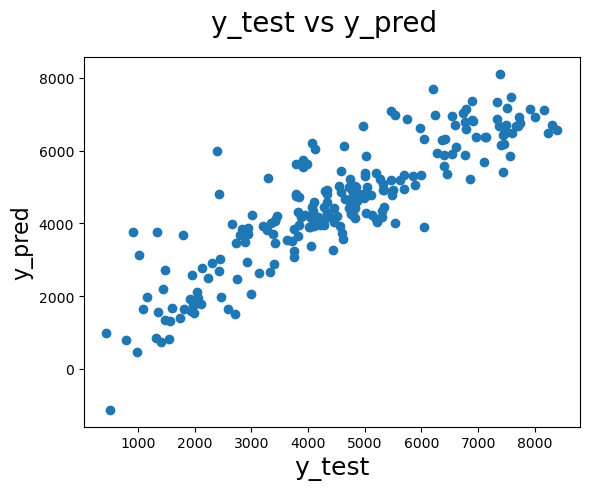

In [68]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [69]:
r2_score(y_test, y_pred)

0.7736064262516149

In [70]:
## the r2 score on the train data is  0.8053
## the r2 score on the test data is 0.7736
## Both these scores indicate that the model is a very good fit on the test and train data
## And having less than 5% difference in the r2 score of the test and train data indicates 
## that the model has a very good prediction accuracy on new data